In [1]:
!ls

compare_models.ipynb
data
distilled_model.pdf
evaluate_distilled_model_results.ipynb
evaluate_predictions.ipynb
model_1.dot
model_1.json
model_1.keras
model_1_predictions.pk
model_1.result
model_2.dot
model_2.json
model_2.keras
model_2_predictions.pk
model_2.result
model_3.keras
model_4.keras
model_5.keras
model_6.keras
model.pdf
nn_connector_model.py
predict_and_save.ipynb
predictions_on_test_sequences_network.pk
preprocess_data.ipynb
__pycache__
ROC_distilled_model_ctu.png
roc_network_ctu.png
test_data.pk
test.json
test.json.result
train_data.pk
train_model.ipynb
write_test_set_to_abbadingo.ipynb
write_train_set_to_abbadingo.ipynb


In [2]:
!ls data

data_preprocessed_10.csv.encoded.dat  X_train.dat
data_preprocessed_10.csv.labels.txt   X_train.dat.ff.final.dot
data_preprocessed_9.csv.encoded.dat   X_train.dat.ff.final.json
data_preprocessed_9.csv.labels.txt    X_train.dat.ff.init.dot
scenarios_9_10.zip		      X_train.dat.ff.init.json
X_test.dat			      y_test.txt


In [3]:
import pandas as pd
import pickle as pk

MODEL_NAME = "model_1"

label_file = "data/y_test.txt"
results_file = "{}.result".format(MODEL_NAME)

df = pd.read_csv(results_file, delimiter=";")
df

,row nr,abbadingo trace,state sequence,score sequence,sum scores,mean scores,min score
0,1,"""0 10 61 61 89 89 61 11 11 11 11 11""","[58,4648,2891,1690,1768,476,2217,7254,2042,7,7]","[-2.06339,-1.11852,-1.13925,-2.76646,-2.60817...",-32.8247,-2.98407,-8.27729
1,1,"""1 10 77 77 77 77 77 77 77 77 77 77""","[75,4,16,50,78,55,42,52,10,12,12]","[-16.4431,-14.2989,-36.4716,-12.7977,-23.4145...",-196.8550,-17.89590,-36.47160
2,1,"""1 10 77 77 77 77 77 77 77 77 77 77""","[75,4,16,50,78,55,42,52,10,12,12]","[-16.4431,-14.2989,-36.4716,-12.7977,-23.4145...",-196.8550,-17.89590,-36.47160
3,1,"""1 10 77 77 77 77 77 77 77 77 77 77""","[75,4,16,50,78,55,42,52,10,12,12]","[-16.4431,-14.2989,-36.4716,-12.7977,-23.4145...",-196.8550,-17.89590,-36.47160
4,1,"""0 10 72 29 6 29 47 47 37 33 29 6""","[70,1102,2585,1989,1963,8189,7926,1448,5105,6...","[-6.32278,-3.64018,-2.89963,-3.81829,-7.28915...",-53.1192,-4.82902,-9.81099
...,...,...,...,...,...,...,...
227920,1,"""1 10 77 77 77 77 77 77 77 77 77 77""","[75,4,16,50,78,55,42,52,10,12,12]","[-16.4431,-14.2989,-36.4716,-12.7977,-23.4145...",-196.8550,-17.89590,-36.47160
227921,1,"""0 2 18 84""","[11,2602,2602]","[-4.82603,-3.45633,-2.12873]",-10.4111,-3.47036,-4.82603
227922,1,"""0 10 89 11 61 11 11 11 11 89 89 89""","[87,4864,7921,7695,5103,5937,3079,3129,3407,5...","[-1.84582,-1.22783,-1.98089,-2.76369,-10.6649...",-53.6597,-4.87815,-16.15980
227923,1,"""0 8 36 10 83 28 83 19 58 58""","[30,5583,311,7097,6161,738,7016,5413,5413]","[-5.31376,-3.96605,-11.1973,-6.49592,-3.58539...",-51.9060,-5.76734,-11.19730


In [4]:
y = list()
with open(label_file, "rt") as inf:
    for line in inf:
        line = line.strip("\n")
        y.append(int(line))
len(df), len(y)

(227925, 227925)

In [5]:
df.columns

Index(['row nr', ' abbadingo trace', ' state sequence', ' score sequence',
       ' sum scores', ' mean scores', ' min score'],
      dtype='object')

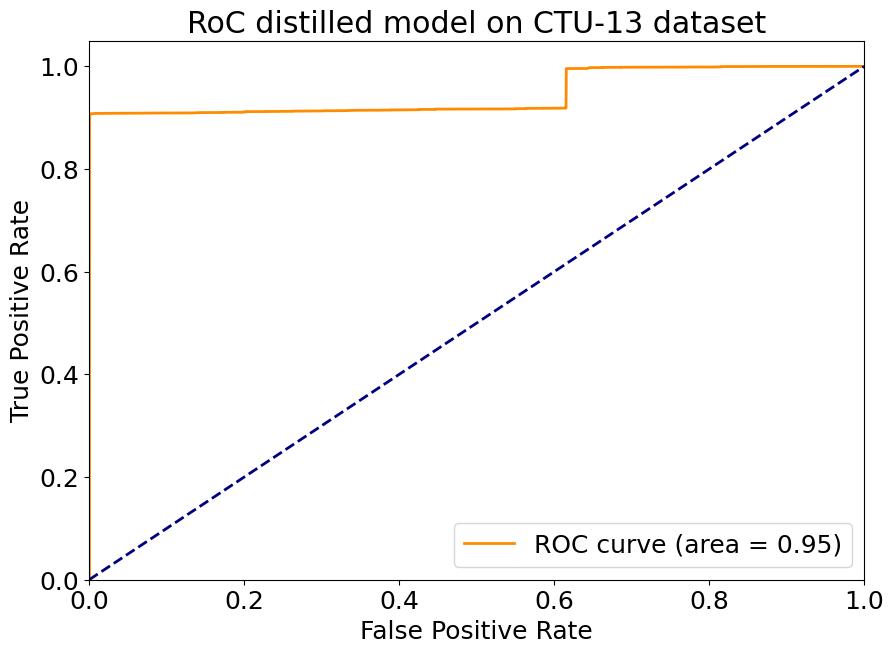

In [8]:
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

score = -df[" min score"]

fpr, tpr, thresholds = roc_curve(y, score)
roc_auc = roc_auc_score(y, score)

plt.figure(figsize=(10, 7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RoC distilled model on CTU-13 dataset")
plt.legend(loc="lower right")
plt.savefig("ROC_distilled_model_ctu_{}.png".format(MODEL_NAME))